### Part A: Review of Excel Exercise for Clustering U.S. Cities

The Excel exercise involves clustering 49 of America's largest cities based on demographic data such as percentage of Black, Hispanic, Asian populations, median age, unemployment rate, and per capita income. The aim is to group cities into four clusters that are demographically similar. The process involves standardizing the demographic attributes to ensure that each attribute contributes equally to the analysis. This is achieved by subtracting the mean and dividing by the standard deviation for each attribute. The Solver tool is used to minimize the sum of squared distances from each city to its nearest cluster center, thereby identifying the optimal clusters.

#### Steps in Excel for Clustering:

1. **Data Preparation**: The demographic data for each city is listed, including percentages of Black, Hispanic, Asian populations, median age, unemployment rate, and per capita income.

2. **Standardization of Attributes**: To ensure each demographic attribute contributes equally, each attribute is standardized. This involves subtracting the mean and dividing by the standard deviation of each attribute across all cities.

3. **Choosing Cluster Anchors**: Initial trial anchors are selected to represent the centers of the clusters. The aim is to assign each city to the nearest cluster anchor based on the standardized attributes.

4. **Calculating Distances**: For each city, the squared distance to each cluster anchor is calculated using the standardized values.

5. **Solver Optimization**: The Solver tool is used to find the set of cluster anchors that minimizes the sum of squared distances of each city from its closest anchor.

6. **Analysis and Interpretation**: The resulting clusters are analyzed to understand the demographic similarities within each cluster and differences between clusters. This helps in interpreting the market segments represented by each cluster.

### Part B: Python and SQLite Implementation

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from scipy.spatial.distance import cdist

# Update the file path and sheet name according to the provided path
file_path = '/Users/kenechukwuezekwem/Library/CloudStorage/OneDrive-Personal/01_NDSU/WORK/NYU SPS IMC/INTG1-GC 1025 _ Database Management & Modeling/Session02/Session02_Lab/data/Session04_LAB_DATA_FirstName LastName_DueDate.xlsx'  # Update this path
sheet_name = 'SOLUTIONS_CLUSTER_A'

# Load data from the Excel file
# Assuming usecols='C:H' captures all the required demographic data
data = pd.read_excel(file_path, sheet_name=sheet_name, usecols='C:H', skiprows=9, nrows=50)

# Assuming the first row contains headers after skiprows, let's rename the columns directly from the Excel sheet
# Replace 'Percentage Black', 'Percentage Hispanic', etc., with the actual column names from your Excel sheet
data.columns = ['Percentage_Black', 'Percentage_Hispanic', 'Percentage_Asian', 'Median_Age', 'Unemployment_Rate', 'Per_Capita_Income']

# Standardize the data attributes
data_standardized = (data - data.mean()) / data.std()

# Save standardized data to SQLite database
conn = sqlite3.connect('cluster.db')
data_standardized.to_sql('us_cities', conn, if_exists='replace', index=False)

# Function to print DataFrame in table format
def print_df_sqlite(query, conn):
    df = pd.read_sql(query, conn)
    print(df.head())

# Display the standardized data table structure and example rows
print("Table Structure and Example Data:")
print_df_sqlite("SELECT * FROM us_cities", conn)

# Define function to assign clusters based on trial anchors
def assign_clusters_sqlite(trial_anchors):
    # Load standardized data from SQLite
    cities = pd.read_sql("SELECT * FROM us_cities", conn)
    # Assuming trial_anchors are the indices of the cities selected as initial cluster centers
    anchors = cities.iloc[trial_anchors].to_numpy()
    # Calculate squared distances using Euclidean metric
    distances = cdist(cities, anchors, 'sqeuclidean')
    # Assign each city to the closest cluster anchor
    cities['Cluster'] = np.argmin(distances, axis=1) + 1
    # Save the updated DataFrame with cluster assignments back to SQLite
    cities.to_sql('us_cities_clustered', conn, if_exists='replace', index=False)
    return cities

# Example usage with trial anchors (indices of cities chosen as initial cluster centers)
trial_anchors = [0, 10, 20, 30]  # Example indices, replace with actual cluster center indices
assigned_clusters = assign_clusters_sqlite(trial_anchors)
print("Assigned Clusters Example:")
print(assigned_clusters[['Cluster']])

# Close the SQLite connection
conn.close()


/var/folders/7d/7c4hrscx0vg406v60dbtjg9h0000gn/T/ipykernel_19198/722054220.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Table Structure and Example Data:
   Percentage_Black  Percentage_Hispanic  Percentage_Asian  Median_Age  \
0          2.341074            -0.743119         -0.455678   -0.433767   
1         -0.709486             0.539525         -0.277852   -1.425234   
2          1.897356            -0.804197         -0.455678    0.557700   
3          0.067020            -0.193414         -0.100027   -0.929500   
4          0.399808            -0.804197         -0.366765    0.061967   

   Unemployment_Rate  Per_Capita_Income  
0          -0.763686           0.305445  
1          -1.504229          -0.592189  
2           1.457945           0.305445  
3          -0.763686           0.903867  
4          -1.504229          -0.292978  
Assigned Clusters Example:
    Cluster
0         1
1         3
2         4
3         3
4         3
5         4
6         1
7         4
8         3
9         4
10        2
11        1
12        3
13        3
14        4
15        4
16        2
17        3
18        3
19

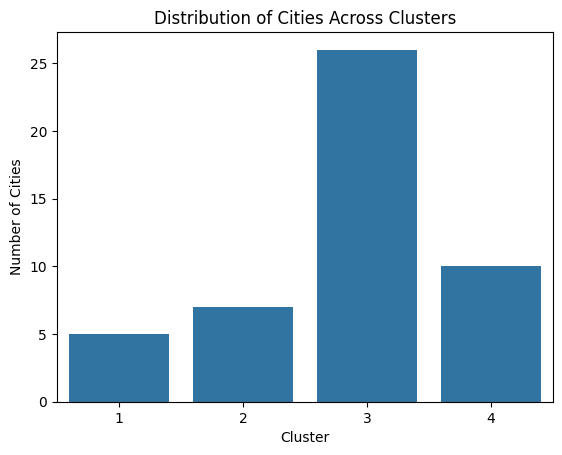

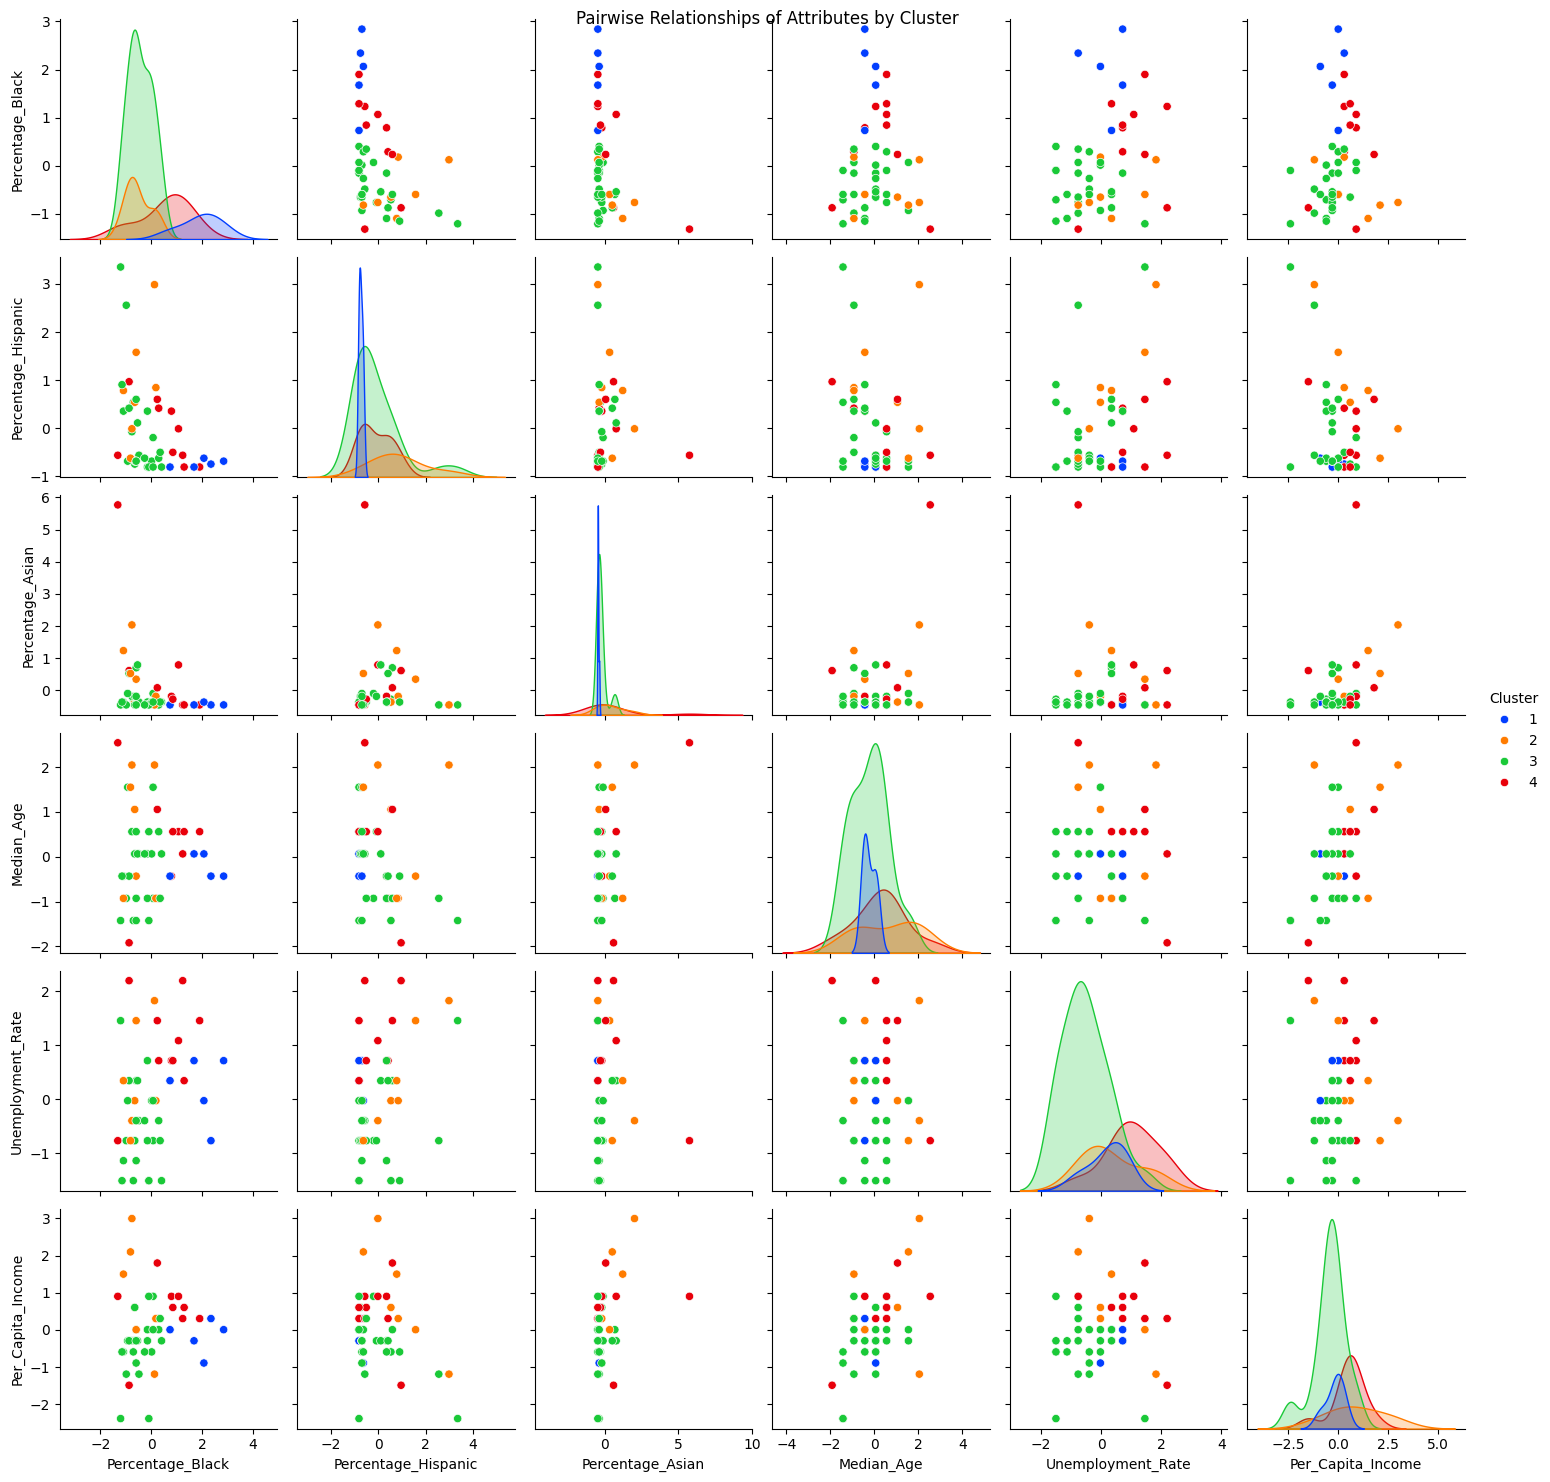

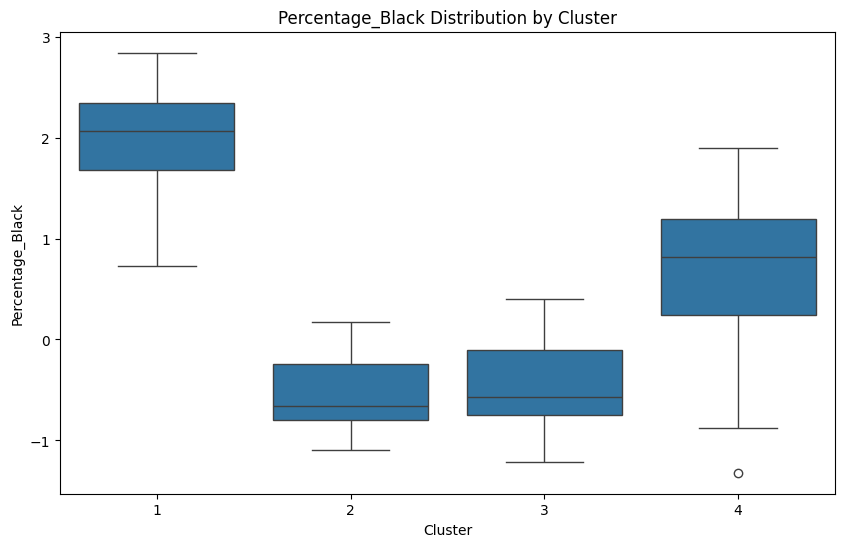

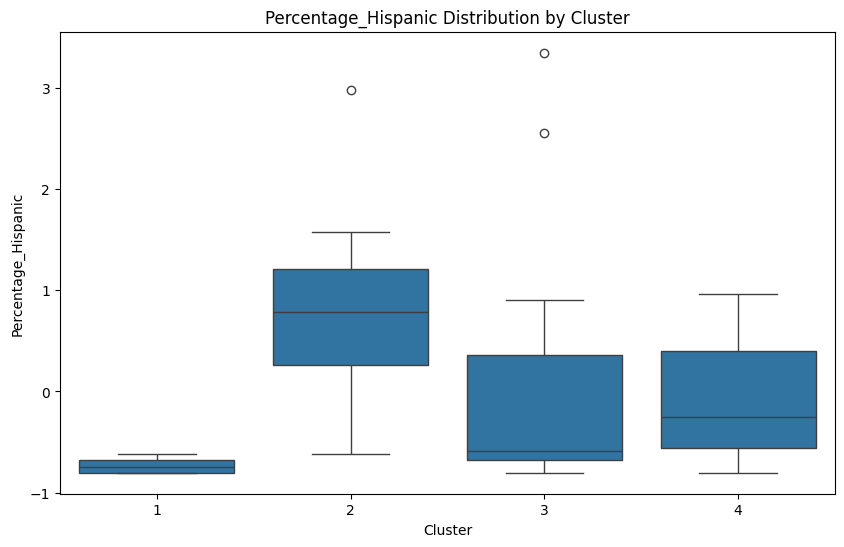

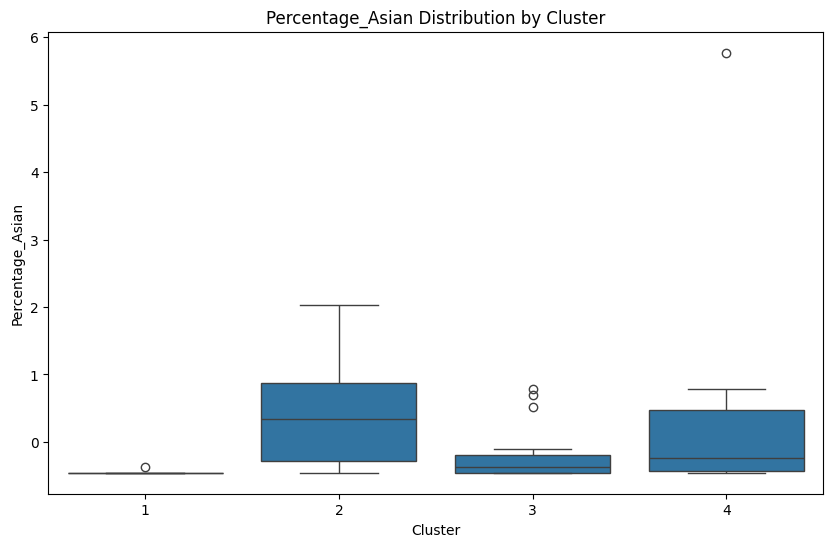

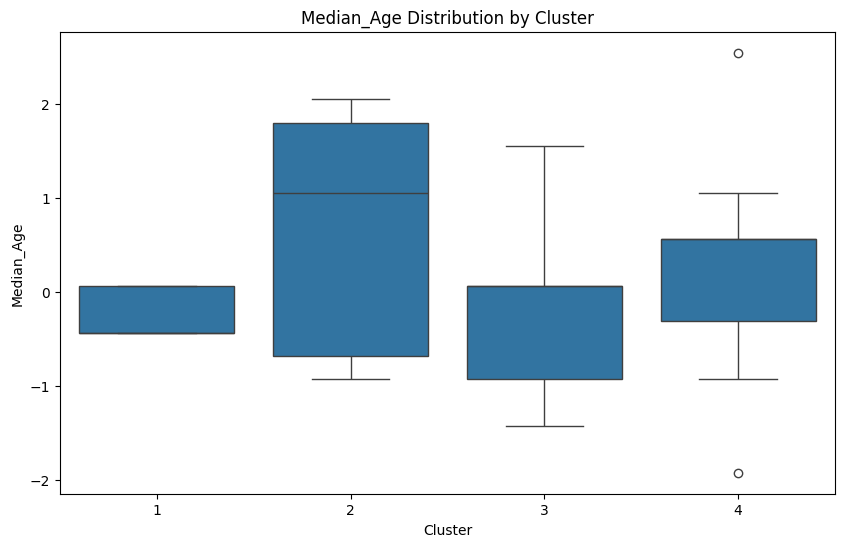

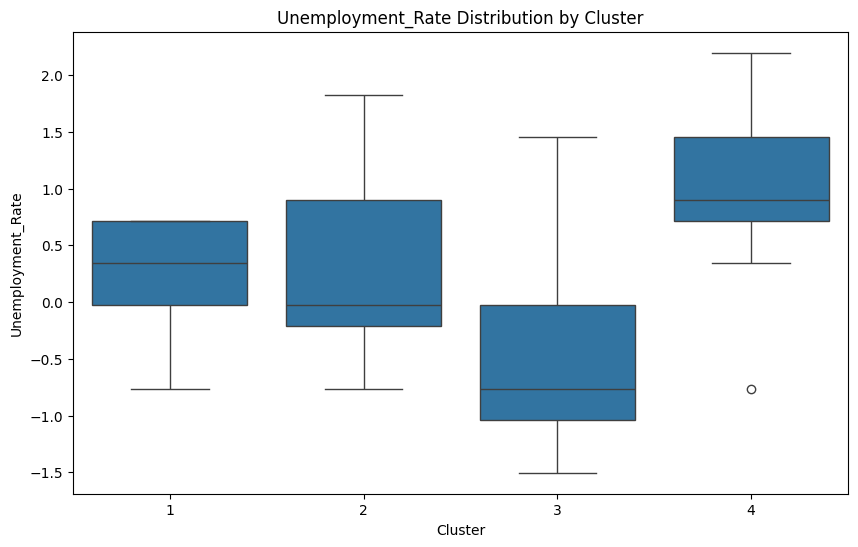

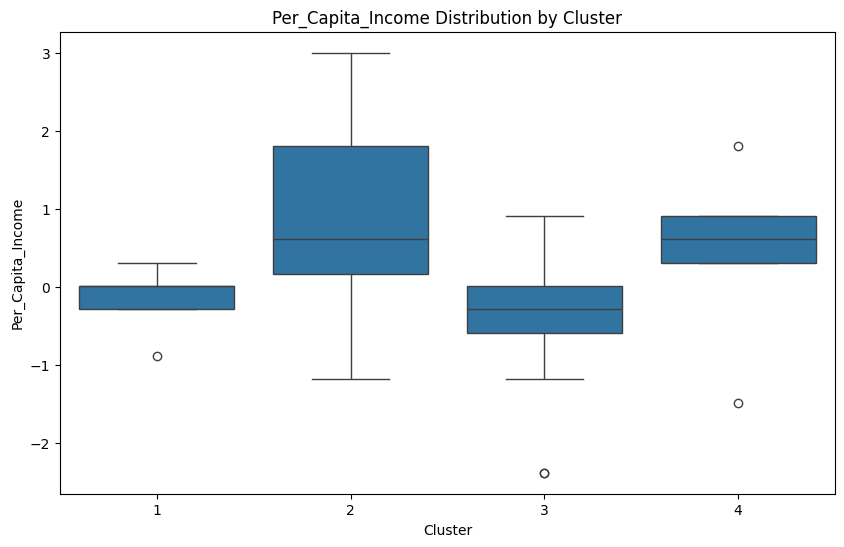

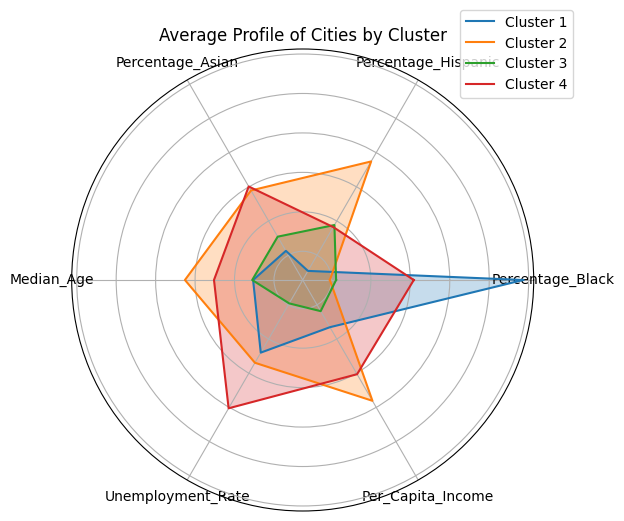

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import numpy as np

# Update 'df' with the DataFrame that contains both the standardized data and the 'Cluster' column
# It seems 'assigned_clusters' already contains this information, so we will use it directly
df = assigned_clusters

# 1. Cluster Distribution Plot
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Cities Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Cities')
plt.show()

# 2. Pair Plot
sns.pairplot(df, hue='Cluster', palette='bright')
plt.suptitle('Pairwise Relationships of Attributes by Cluster', verticalalignment='baseline', horizontalalignment='center')
plt.show()

# 3. Box Plot for each demographic attribute by Cluster
attributes = ['Percentage_Black', 'Percentage_Hispanic', 'Percentage_Asian', 'Median_Age', 'Unemployment_Rate', 'Per_Capita_Income']
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=attribute, data=df)
    plt.title(f'{attribute} Distribution by Cluster')
    plt.show()

# 4. Radar Chart for Cluster Profiles
# Calculating the mean of each attribute per cluster
labels = np.array(attributes)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
stats = df.groupby('Cluster')[attributes].mean().values

# The radar chart requires a closed loop
stats = np.concatenate((stats, stats[:,[0]]), axis=1)
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i in range(stats.shape[0]):
    ax.fill(angles, stats[i], alpha=0.25)
    ax.plot(angles, stats[i], label=f'Cluster {i+1}')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Average Profile of Cities by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()
